# 課題　ボストン住宅価格予測 決定木

### データを取得する

In [24]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

### 取得データをDataFrameにする

In [25]:
X=pd.DataFrame(boston.data, columns=boston.feature_names)
y=pd.DataFrame(boston.target, columns=["MEDV"])
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


### データ探索
###### 一変数の可視化 - 生データセットの各フィールドの要約統計情報を提供
###### 二変数の可視化 - データセット内の各変数と目的の目標変数との関係を見つけるために実行
###### 多変数の可視化 - データセット内の異なるフィールド間の相互作用を理解するために実行されます
###### 次元削除 - データの次元数を減らし、人間が理解できる次元で可視化を行う、または次元を圧縮することで高速に計算を行う（データ探索については前者）

### 基本的なデータ探索
###### 基本的なデータ探索について記述せよ
このデータセットは何であるか（目的、作成者、作成時期）    
Harrison、D. and Rubinfeldによって作成されたUCI ML住宅データセットのコピー。カーネギーメロン大学のライブラリから取得された。１９78年に現データが作成され、おもに回帰分析に関する機械学習論文で使用されている。

###### 各カラムの意味
- CRIM…１人あたりの犯罪率
- ZN…25,000平方フィート以上の住宅地の割合
- INDUS…小売以外の業者の割合
- CHAS…チャールズ川の河川沿いか否か（当てはまる場合は１、そうでない場合は０）
- NOX…酸化窒素濃度（1,000万分の１）
- RM…住居あたりの平均部屋数
- AGE…１９４０年以内に建築された所有者がいるユニットの割合
- DIS…ボストンにある５つの雇用センターへの加重距離
- RAD…放射状の高速道路へのアクセス指標
- TAX…１万ドルあたりの住宅税率
- PTRATIO…街ごとの生徒ー教師の比率
- B…街ごとの黒人の割合
- LSTAT…人口が低い状態
- MEDV…所有者がいる住宅の価格の中央値

### 一変数の可視化
pandasのdescribeメソッドで基本統計量を出力する。  
※stdはstandard deviation（標準偏差）

加えて、infoメソッドで欠損状況とカラム構成を確認する。

In [26]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### describeメソッドを用いることで把握できたこと(考察)を記述せよ
###### 前処理・モデル選択・特徴量選択
・データ型はすべてfloatであるため、前処理において文字列関連の変換処理は必要ない。  
・欠損値が一切ないため、前処理において欠損処理も必要ない。  
・データ間の最小ー最大範囲が極端に異なるため、精度が出ない場合は正規化処理が必要。  
・目的変数は住宅価格の予想であるため、回帰モデルを使用する必要がある。  
・極端な外れ値を含むデータ（CRIM、ZN,B）  、過半数が０であるデータ（ZIN、CHAS）  、非常にばらつきが少ないデータ（RM、PTRATIO）については特徴量としての取扱に注意が必要。

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


### 二変数の可視化

### 二変数の可視化　相関
pandas.DataFrame.corr()やseaborn.pairplot()を使って可視化する。  
目的変数と説明変数が別データフレームにあるため、相関確認用の統合データフレームを作成。


In [28]:
corr_data = pd.concat([X,y], axis=1)

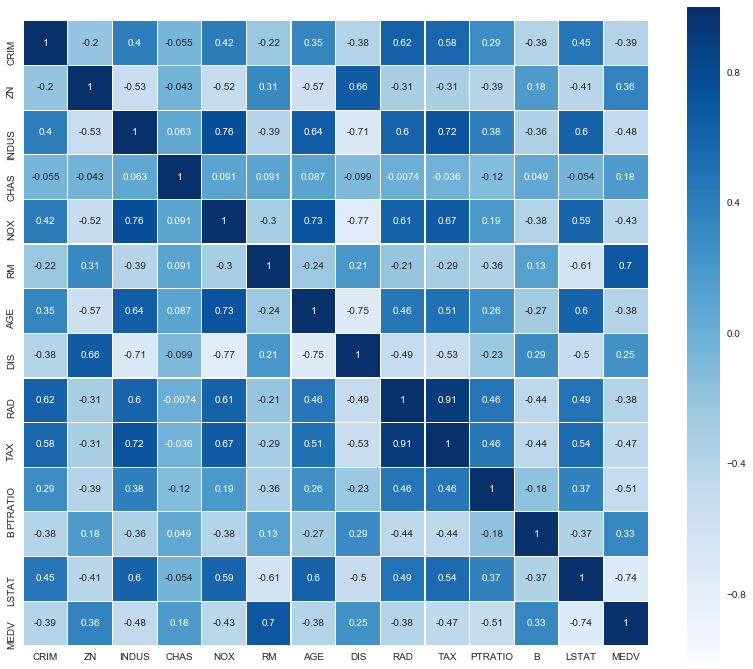

In [29]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_data.corr(),linewidths=0.1,vmax=1.0,square=True, annot=True, cmap="Blues")

### 二変数の可視化について記述せよ　相関
相関とは、条件間（ここでは特徴量間）の関係を示す。一方が大きくなると他方も大きくなる「正の相関」、一方が大きくなると他方が小さくなる「負の相関」、明確な関係が見られない「無相関」という３種類に分類される。相関の程度を数字にして表したものを「相関係数」といい、-１以上１以下の値を取る。

MEDVと相関があるとされる変数は、相関係数が大きい順に「LSTAT（負）」「RM（正）」「PTRATIO（負）」である。

相関のある変数を学習に用いることで、回帰モデルの予測精度を向上させることができる。

### 相関の注意点について記述せよ
相関係数は変数の共分散を各変数の標準偏差の積で割ることで算出される。共分散の算出には平均値を用いるため、外れ値の影響を大きく受けてしまう。そのため、相関係数を取った際には散布図を見て外れ値の有無を確認することが必要。

次に、分布形が線形か非線型かを確認する。相関係数は線形的な関係を前提にしているため、U字のような分布をしているときに何らかの意味・法則があるかもしれないにもかかわらず相関係数は０近くになってしまっている場合がある。

さらに、分割相関について確認する。変数をいくつかの区分にわけた際、そのすべてで同じように相関が存在しているとは限らない。ある区分では強い相関が出ているが、他方では弱くなることも考えられる。

### 二変数の可視化　プロット

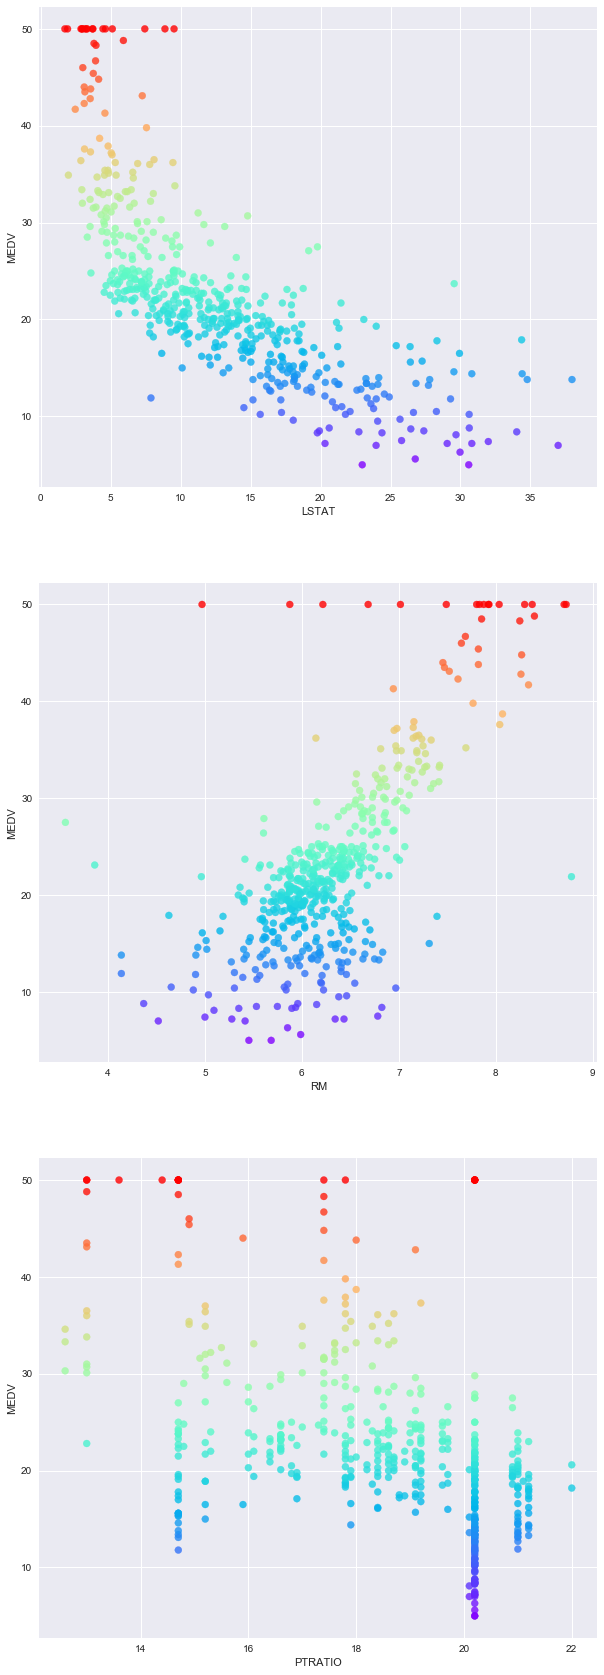

In [30]:
plt.figure(figsize = (10,30))
y_data = corr_data["MEDV"]

plt.subplot(3,1,1)
plt.scatter(corr_data["LSTAT"],y, alpha=0.8, c=corr_data["MEDV"],cmap="rainbow")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.subplot(3,1,2)
plt.scatter(corr_data["RM"],y, alpha=0.8, c=corr_data["MEDV"],cmap="rainbow")
plt.xlabel("RM")
plt.ylabel("MEDV")

plt.subplot(3,1,3)
plt.scatter(corr_data["PTRATIO"],y, alpha=0.8, c=corr_data["MEDV"],cmap="rainbow")
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")

### 二変数の可視化について記述せよ　プロット
散布図の状態から、RMは極端な外れ値が複数個含まれており、PTRATIOはばらつきが非常に大きい。そのため、説明変数としてLSTATを採用する。

### データセット分割

In [31]:
X = X["LSTAT"]
y = y["MEDV"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### 学習

In [33]:
depth = [1,2,3]
regressors = []

for d in depth:
    regressor = DecisionTreeRegressor(max_depth=d)
    regressor.fit(X_train[:,None],y_train)
    regressors.append(regressor)

### 決定係数

In [34]:
n = 1
for i in regressors:
    print('深度 {:}の決定係数'.format(n))
    print('Train score: {:.3f}'.format(i.score(X_train[:,None], y_train)))
    print('Test score: {:.3f}'.format(i.score(X_test[:,None], y_test)))
    n += 1

深度 1の決定係数
Train score: 0.473
Test score: 0.246
深度 2の決定係数
Train score: 0.689
Test score: 0.411
深度 3の決定係数
Train score: 0.736
Test score: 0.516


### 学習曲線

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")


Automatically created module for IPython interactive environment


/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either 

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x1078aed20, file "/Use...3.6/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/takahashi.noriaki/.pyenv/versions/anacond...ges/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/Users/takahashi.noriaki/.pyenv/versions/anacond...lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/takah.../python3.6/site-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x1078aed20, file "/Use...3.6/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/takahashi.noriaki/.pyenv/versions/anacond...ges/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/Users/takahashi.noriaki/.pyenv/versions/anacond...lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/takah.../python3.6/site-packages/ipykernel/kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'print(__doc__)\n\nfrom sklearn.model_selection imp...test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-11-26T13:30:07.652795', 'msg_id': '17F9496DF84A4E6C9E45483178608655', 'msg_type': 'execute_request', 'session': '6CFC7DBE3B464FDAA125233A92267B74', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '17F9496DF84A4E6C9E45483178608655', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'6CFC7DBE3B464FDAA125233A92267B74']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'print(__doc__)\n\nfrom sklearn.model_selection imp...test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-11-26T13:30:07.652795', 'msg_id': '17F9496DF84A4E6C9E45483178608655', 'msg_type': 'execute_request', 'session': '6CFC7DBE3B464FDAA125233A92267B74', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '17F9496DF84A4E6C9E45483178608655', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'6CFC7DBE3B464FDAA125233A92267B74'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'print(__doc__)\n\nfrom sklearn.model_selection imp...test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-11-26T13:30:07.652795', 'msg_id': '17F9496DF84A4E6C9E45483178608655', 'msg_type': 'execute_request', 'session': '6CFC7DBE3B464FDAA125233A92267B74', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '17F9496DF84A4E6C9E45483178608655', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='print(__doc__)\n\nfrom sklearn.model_selection imp...test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'print(__doc__)\n\nfrom sklearn.model_selection imp...test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('print(__doc__)\n\nfrom sklearn.model_selection imp...test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('print(__doc__)\n\nfrom sklearn.model_selection imp...test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='print(__doc__)\n\nfrom sklearn.model_selection imp...test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.For object>], cell_name='<ipython-input-45-d272696c4be8>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 118977ba8, execution_..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x10945e930, file "<ipython-input-45-d272696c4be8>", line 14>
        result = <ExecutionResult object at 118977ba8, execution_..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x10945e930, file "<ipython-input-45-d272696c4be8>", line 14>, result=<ExecutionResult object at 118977ba8, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x10945e930, file "<ipython-input-45-d272696c4be8>", line 14>
        self.user_global_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'In': ['', 'print(__doc__)\n\ntitle = "Learning Curves (Decisi...ures , target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', 'def plot_learning_curve(estimator, title, X, y, ...ss-validation score")\n\n    plt.legend(loc="best")', "from sklearn.datasets import load_boston\nfrom sk...ne')\n\nboston = load_boston()\nboston.feature_names", 'def plot_learning_curve(estimator, title, X, y, ...ss-validation score")\n\n    plt.legend(loc="best")', 'from sklearn.model_selection import ShuffleSplit...ures , target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', "from sklearn.datasets import load_boston\nfrom sk...ne')\n\nboston = load_boston()\nboston.feature_names", 'X=pd.DataFrame(boston.data, columns=boston.featu...Frame(boston.target, columns=["MEDV"])\nX.head(10)', 'X.describe()', 'X.info()', 'corr_data = pd.concat([X,y], axis=1)', 'plt.figure(figsize=(14,12))\nsns.heatmap(corr_dat...1,vmax=1.0,square=True, annot=True, cmap="Blues")', 'plt.figure(figsize = (10,30))\ny_data = corr_data...ainbow")\nplt.xlabel("PTRATIO")\nplt.ylabel("MEDV")', 'X = X["LSTAT"]\ny = y["MEDV"]', 'X_train, X_test, y_train, y_test = train_test_sp...y, train_size=0.8, test_size=0.2, random_state=0)', 'depth = [1,2,3]\nregressors = []\n\nfor d in depth:...:,None],y_train)\n    regressors.append(regressor)', "n = 1\nfor i in regressors:\n    print('深度 {:}の決定係...rmat(i.score(X_test[:,None], y_test)))\n    n += 1", 'def plot_learning_curve(estimator, title, X, y, ...ss-validation score")\n\n    plt.legend(loc="best")', 'from sklearn.model_selection import ShuffleSplit...ures , target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', 'print(__doc__)\n\ntitle = "Learning Curves (Decisi...ures , target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', ...], 'Out': {3: array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM...X', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7'), 6: array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM...X', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7'), 7:       CRIM    ZN  INDUS  CHAS    NOX     RM    A...15.2  386.63  29.93  
9     15.2  386.71  17.10  , 8:              CRIM          ZN       INDUS       ....360000  
75%     16.955000  
max     37.970000  , 11: <matplotlib.axes._subplots.AxesSubplot object>, 12: <matplotlib.text.Text object>, 24: array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM...X', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7'), 25:       CRIM    ZN  INDUS  CHAS    NOX     RM    A...15.2  386.63  29.93  
9     15.2  386.71  17.10  , 26:              CRIM          ZN       INDUS       ....360000  
75%     16.955000  
max     37.970000  , 29: <matplotlib.axes._subplots.AxesSubplot object>, ...}, 'ShuffleSplit': <class 'sklearn.model_selection._split.ShuffleSplit'>, 'X': 0       4.98
1       9.14
2       4.03
3       2...    6.48
505     7.88
Name: LSTAT, dtype: float64, 'X_test': 329     7.34
371     9.53
219    10.50
403    19...    9.38
108    12.27
Name: LSTAT, dtype: float64, 'X_train': 220     9.71
71      9.88
240    11.38
6      12...   18.80
172    14.69
Name: LSTAT, dtype: float64, '_': <matplotlib.text.Text object>, '_11': <matplotlib.axes._subplots.AxesSubplot object>, '_12': <matplotlib.text.Text object>, ...}
        self.user_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'In': ['', 'print(__doc__)\n\ntitle = "Learning Curves (Decisi...ures , target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', 'def plot_learning_curve(estimator, title, X, y, ...ss-validation score")\n\n    plt.legend(loc="best")', "from sklearn.datasets import load_boston\nfrom sk...ne')\n\nboston = load_boston()\nboston.feature_names", 'def plot_learning_curve(estimator, title, X, y, ...ss-validation score")\n\n    plt.legend(loc="best")', 'from sklearn.model_selection import ShuffleSplit...ures , target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', "from sklearn.datasets import load_boston\nfrom sk...ne')\n\nboston = load_boston()\nboston.feature_names", 'X=pd.DataFrame(boston.data, columns=boston.featu...Frame(boston.target, columns=["MEDV"])\nX.head(10)', 'X.describe()', 'X.info()', 'corr_data = pd.concat([X,y], axis=1)', 'plt.figure(figsize=(14,12))\nsns.heatmap(corr_dat...1,vmax=1.0,square=True, annot=True, cmap="Blues")', 'plt.figure(figsize = (10,30))\ny_data = corr_data...ainbow")\nplt.xlabel("PTRATIO")\nplt.ylabel("MEDV")', 'X = X["LSTAT"]\ny = y["MEDV"]', 'X_train, X_test, y_train, y_test = train_test_sp...y, train_size=0.8, test_size=0.2, random_state=0)', 'depth = [1,2,3]\nregressors = []\n\nfor d in depth:...:,None],y_train)\n    regressors.append(regressor)', "n = 1\nfor i in regressors:\n    print('深度 {:}の決定係...rmat(i.score(X_test[:,None], y_test)))\n    n += 1", 'def plot_learning_curve(estimator, title, X, y, ...ss-validation score")\n\n    plt.legend(loc="best")', 'from sklearn.model_selection import ShuffleSplit...ures , target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', 'print(__doc__)\n\ntitle = "Learning Curves (Decisi...ures , target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)', ...], 'Out': {3: array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM...X', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7'), 6: array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM...X', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7'), 7:       CRIM    ZN  INDUS  CHAS    NOX     RM    A...15.2  386.63  29.93  
9     15.2  386.71  17.10  , 8:              CRIM          ZN       INDUS       ....360000  
75%     16.955000  
max     37.970000  , 11: <matplotlib.axes._subplots.AxesSubplot object>, 12: <matplotlib.text.Text object>, 24: array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM...X', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7'), 25:       CRIM    ZN  INDUS  CHAS    NOX     RM    A...15.2  386.63  29.93  
9     15.2  386.71  17.10  , 26:              CRIM          ZN       INDUS       ....360000  
75%     16.955000  
max     37.970000  , 29: <matplotlib.axes._subplots.AxesSubplot object>, ...}, 'ShuffleSplit': <class 'sklearn.model_selection._split.ShuffleSplit'>, 'X': 0       4.98
1       9.14
2       4.03
3       2...    6.48
505     7.88
Name: LSTAT, dtype: float64, 'X_test': 329     7.34
371     9.53
219    10.50
403    19...    9.38
108    12.27
Name: LSTAT, dtype: float64, 'X_train': 220     9.71
71      9.88
240    11.38
6      12...   18.80
172    14.69
Name: LSTAT, dtype: float64, '_': <matplotlib.text.Text object>, '_11': <matplotlib.axes._subplots.AxesSubplot object>, '_12': <matplotlib.text.Text object>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/takahashi.noriaki/Desktop/python/task/<ipython-input-45-d272696c4be8> in <module>()
     11 # score curves, each time with 20% data randomly selected as a validation set.
     12 cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
     13 
     14 for degree in range(1,11):
     15     estimator = DecisionTreeRegressor(max_depth=degree)
---> 16     plot_learning_curve(estimator, title, X_test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
     17 
     18 
     19 
     20 

...........................................................................
/Users/takahashi.noriaki/Desktop/python/task/<ipython-input-37-7070676b50b3> in plot_learning_curve(estimator=DecisionTreeRegressor(criterion='mse', max_depth...e, random_state=None,
           splitter='best'), title='Learning Curves (DecisionTreeRegressor)', X=329     7.34
371     9.53
219    10.50
403    19...    9.38
108    12.27
Name: LSTAT, dtype: float64, y=329    22.6
371    50.0
219    23.0
403     8.3
...13    28.1
108    19.8
Name: MEDV, dtype: float64, ylim=(0.3, 1.01), cv=ShuffleSplit(n_splits=100, random_state=1, test_size=0.2, train_size=None), n_jobs=4, train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]))
     48     if ylim is not None:
     49         plt.ylim(*ylim)
     50     plt.xlabel("Training examples")
     51     plt.ylabel("Score")
     52     train_sizes, train_scores, test_scores = learning_curve(
---> 53         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
     54     train_scores_mean = np.mean(train_scores, axis=1)
     55     train_scores_std = np.std(train_scores, axis=1)
     56     test_scores_mean = np.mean(test_scores, axis=1)
     57     test_scores_std = np.std(test_scores, axis=1)

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in learning_curve(estimator=DecisionTreeRegressor(criterion='mse', max_depth...e, random_state=None,
           splitter='best'), X=329     7.34
371     9.53
219    10.50
403    19...    9.38
108    12.27
Name: LSTAT, dtype: float64, y=329    22.6
371    50.0
219    23.0
403     8.3
...13    28.1
108    19.8
Name: MEDV, dtype: float64, groups=None, train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]), cv=ShuffleSplit(n_splits=100, random_state=1, test_size=0.2, train_size=None), scoring=None, exploit_incremental_learning=False, n_jobs=4, pre_dispatch='all', verbose=0)
    767             scorer, verbose) for train, test in cv_iter)
    768     else:
    769         out = parallel(delayed(_fit_and_score)(
    770             clone(estimator), X, y, scorer, train[:n_train_samples], test,
    771             verbose, parameters=None, fit_params=None, return_train_score=True)
--> 772             for train, test in cv_iter
        cv_iter = [(array([ 32,  40,  39,  38,  46,  42,  10,   2,  ...,  64,  79,   5,  75,   9,
        72,  12,  37]), array([ 95,  78,  17, 101,  36,  86,  55,  83,  ...,
        94,  65,  35,  66,  70,  81,  80,  33])), (array([ 97,  38,  94,   3,  29,  55,  16,  88,  ...,  45,   7,  36,  30,  20,
        43,  76,  75]), array([64, 96, 18, 58, 26, 31, 28, 51, 41, 62, 87, 44, 79, 67,  4, 63,  1,
       40, 11,  0, 35])), (array([ 12,  69,  18,  87,  93,  37,  54,  33,  ...,  24,  83,  64,  41,  79,
        50,  77,  84]), array([ 8, 40, 51, 43, 46, 36,  1, 62, 27, 75, 55,  2, 11, 29, 31, 81, 72,
       78, 49, 73, 74])), (array([  4,  51,   0,   6,  77,  49,  10,  56, 1...,  26,  94,  82,   1,  43,
        27,  89,  52]), array([17,  7, 19, 32, 86, 68, 20, 15, 31, 44, 42, 62, 97, 59, 47, 67, 24,
       98, 78, 88, 75])), (array([ 22,  94,  41,  53,  78,  86,  99,  51,  ...,   8,  30,  14,  61,  11,
        29,  16,  85]), array([62, 83, 37,  0, 49, 39, 45, 90, 76, 55, 79, 77, 98,  1, 67,  9, 93,
       38,  7, 20, 70])), (array([ 26,   0,  42,  86,  97,  16,  79,   8,  ...,  52,  92,  70,  78,  18,
        93,  37,  64]), array([80, 44, 41, 91,  3, 21, 35,  9,  2, 23, 68, 59, 25, 20, 73, 99,  4,
       14, 96, 88, 38])), (array([ 92,  80,  56,  18,  59,  19,  30,   2,  ...,  64,  45,  68,  76,  52,
       100,  11,  97]), array([63, 57, 86, 12, 39, 98, 36, 49, 99, 60, 47, 42, 54, 88, 20, 22, 26,
       23,  9, 14, 17])), (array([ 55,  34,  52,  98,  48,  50,  90,  42,  ...,  31,  39,  86,  23,  70,
        69,  71,  41]), array([  8,  11,   9,  29,  17,  65,  92,  73,  ...,
        24,   5,  45,   2, 100,  97,  63,  13])), (array([ 37,  26,  39,  72,  73,  70,  67,  62,  ...,  82,  30,  51,   1,  69,
        41,  43,  32]), array([ 19,  58, 101,  17,  52,  95,  84,  12,  ...,
        16,  20,  15,  29,  80,  91,  34,  28])), (array([ 72,  93,  21,   1,  58, 100,  49,  18,  ...,  82,  75,  46,  32,  66,
         7,  90,  31]), array([16, 20, 33, 36, 89, 38, 14, 27,  2, 57, 87, 51, 39, 56, 63, 71, 35,
        8, 53, 26, 30])), (array([  5,   1,  65,  98,  37,  41,  74,  33,  ...,   8,  82,  92,  44,  34,
        85,  28,  75]), array([ 70,  67,  49,  43,  54,  48,  23,  24,  ...,
        21,  58,   7,  17, 101,  95,  94,  40])), (array([ 25,  38,  56,  12,  61,  62,  86,  71,  ...,  85,  54,  82,  68,  20,
       100,   8,  32]), array([  1,  49,  81,  69,  88,  76,  72,   5,  ...,
        37,  96,  77,  26,  16,  34,  79,  14])), (array([ 69,   7,  76,  65,  68,  28,  96,  70,  ...,  15,  99,  52,  49,  55,
        24,  57,  87]), array([ 75,  53,  79,  29,  34,  44,  35,  50,  ...,
        30, 101,  22,  45,  48,  97,  88,  64])), (array([ 19,  12,  69, 101,   6,  67,  40,  97,  ...,  20,  38,  87,  28,  52,
        65,  45,  62]), array([22, 80, 74, 27,  1, 57, 25, 37, 90,  8, 84, 48, 41, 54, 58, 99, 63,
       21, 23,  3, 43])), (array([ 66,  55,   6,  69,  68,  37,  52,   9,  ...,  80,  32,  46,  24,  14,
        22,  76,  60]), array([73, 30, 11, 85, 26, 83, 93, 49, 23, 86, 28, 45, 82, 81, 75, 65,  1,
       91, 17,  2, 56])), (array([ 27,  59,  35,  56,  55,  46,   7,  47,  ...,  32,  51,  79,  18,  23,
        52,  40,  20]), array([36, 10,  5, 95, 43, 84, 11, 39, 26, 14, 88, 16, 99, 62, 19, 77, 38,
       72, 42,  8,  9])), (array([ 45,  58,  64,  75,   8,  47,  37,  68,  ...,  59,  53,  93,  11,  85,
        17,   2,  34]), array([39,  6, 65, 43, 26, 79, 72, 15, 12, 33, 88, 76, 54,  1, 44, 60, 77,
       24, 80, 29, 50])), (array([ 76,  91,  23,  64,  98,  49,  80,   7,  ...,  38,  52,  40,  56,  24,
        37,  26,  79]), array([ 66,  83,   4,  22,  47,  58,  81,  96,  ...,
        51,  28, 101,   2,  93,  45,  46,  85])), (array([ 61,  42,  56,  50,  28,  78,  64,  22,  ...,  44,  85,  69,   6,  34,
        95,  79,  11]), array([  9,  77,   2,  21,  68,  62,  96,  18,  ...,
        81,  83,  63,  23,  99,  80,  13,  74])), (array([ 99,  25,  97,  73,  35,  56,  17,  55,  ...,  84,  71,  78,  81,  10,
        85,  12,  54]), array([ 21,  60, 101,  57,  98,  95,  19,  72,  ...,
        61,  77,  96,  51,  43,  45,   4,  66])), ...]
    773             for n_train_samples in train_sizes_abs)
    774         out = np.array(out)
    775         n_cv_folds = out.shape[0] // n_unique_ticks
    776         out = out.reshape(n_cv_folds, n_unique_ticks, 2)

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object learning_curve.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sun Nov 26 13:30:07 2017
PID: 1851Python 3.6.0: /Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/bin/python
...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (DecisionTreeRegressor(criterion='mse', max_depth...e, random_state=None,
           splitter='best'), 329     7.34
371     9.53
219    10.50
403    19...    9.38
108    12.27
Name: LSTAT, dtype: float64, 329    22.6
371    50.0
219    23.0
403     8.3
...13    28.1
108    19.8
Name: MEDV, dtype: float64, <function _passthrough_scorer>, array([32, 40, 39, 38, 46, 42, 10,  2]), array([ 95,  78,  17, 101,  36,  86,  55,  83,  ...,
        94,  65,  35,  66,  70,  81,  80,  33]), 0), {'fit_params': None, 'parameters': None, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (DecisionTreeRegressor(criterion='mse', max_depth...e, random_state=None,
           splitter='best'), 329     7.34
371     9.53
219    10.50
403    19...    9.38
108    12.27
Name: LSTAT, dtype: float64, 329    22.6
371    50.0
219    23.0
403     8.3
...13    28.1
108    19.8
Name: MEDV, dtype: float64, <function _passthrough_scorer>, array([32, 40, 39, 38, 46, 42, 10,  2]), array([ 95,  78,  17, 101,  36,  86,  55,  83,  ...,
        94,  65,  35,  66,  70,  81,  80,  33]), 0)
        kwargs = {'fit_params': None, 'parameters': None, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=DecisionTreeRegressor(criterion='mse', max_depth...e, random_state=None,
           splitter='best'), X=329     7.34
371     9.53
219    10.50
403    19...    9.38
108    12.27
Name: LSTAT, dtype: float64, y=329    22.6
371    50.0
219    23.0
403     8.3
...13    28.1
108    19.8
Name: MEDV, dtype: float64, scorer=<function _passthrough_scorer>, train=array([32, 40, 39, 38, 46, 42, 10,  2]), test=array([ 95,  78,  17, 101,  36,  86,  55,  83,  ...,
        94,  65,  35,  66,  70,  81,  80,  33]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    233 
    234     try:
    235         if y_train is None:
    236             estimator.fit(X_train, **fit_params)
    237         else:
--> 238             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method DecisionTreeRegressor.fit of Decis..., random_state=None,
           splitter='best')>
        X_train = 247    10.15
293     8.58
475    24.10
430    17...   20.62
219    10.50
Name: LSTAT, dtype: float64
        y_train = 247    20.5
293    23.9
475    13.3
430    14.5
...18     8.8
219    23.0
Name: MEDV, dtype: float64
        fit_params = {}
    239 
    240     except Exception as e:
    241         # Note fit time as time until error
    242         fit_time = time.time() - start_time

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...e, random_state=None,
           splitter='best'), X=247    10.15
293     8.58
475    24.10
430    17...   20.62
219    10.50
Name: LSTAT, dtype: float64, y=247    20.5
293    23.9
475    13.3
430    14.5
...18     8.8
219    23.0
Name: MEDV, dtype: float64, sample_weight=None, check_input=True, X_idx_sorted=None)
   1024 
   1025         super(DecisionTreeRegressor, self).fit(
   1026             X, y,
   1027             sample_weight=sample_weight,
   1028             check_input=check_input,
-> 1029             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1030         return self
   1031 
   1032 
   1033 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
/Users/takahashi.noriaki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...e, random_state=None,
           splitter='best'), X=array([[ 10.14999962,   8.57999992,  24.10000038...015,  20.62000084,  10.5       ]], dtype=float32), y=array([[ 20.5],
       [ 23.9],
       [ 13.3],
...
       [ 19.8],
       [  8.8],
       [ 23. ]]), sample_weight=None, check_input=True, X_idx_sorted=None)
    235 
    236         self.max_features_ = max_features
    237 
    238         if len(y) != n_samples:
    239             raise ValueError("Number of labels=%d does not match "
--> 240                              "number of samples=%d" % (len(y), n_samples))
        y = array([[ 20.5],
       [ 23.9],
       [ 13.3],
...
       [ 19.8],
       [  8.8],
       [ 23. ]])
        n_samples = 1
    241         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    242             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    243         if max_depth <= 0:
    244             raise ValueError("max_depth must be greater than zero. ")

ValueError: Number of labels=8 does not match number of samples=1
___________________________________________________________________________

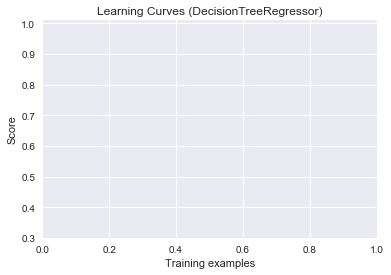

In [45]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor



title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title, X_test , y_test, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

### 学習曲線について記述せよ
###### High varianceとは何か
###### High Biasとは何か 
###### もっとも結果が良いと思われた深さをひとつ選択せよ
###### なぜその深さが最も良いか記述せよ
###### その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ

### グリッドサーチ

### グリッドサーチについて記述せよ

### グリッドサーチを使いこなそう

### テスト